In [10]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [12]:
x.requires_grad_(True)
x.grad
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [13]:
x.grad

In [14]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [15]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [16]:
x.grad == 4 * x

tensor([True, True, True, True])

In [17]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [18]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [23]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad, x.grad == u

(tensor([0., 1., 4., 9.]), tensor([True, True, True, True]))

In [24]:
x.grad.zero_()
y.sum().backward()
x.grad, x.grad == 2 * x

(tensor([0., 2., 4., 6.]), tensor([True, True, True, True]))

In [25]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b

    return c

In [26]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [27]:
a.grad, a.grad == d / a

(tensor(512.), tensor(True))

In [28]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [29]:
fair_probs = torch.ones([6]) / 6

In [30]:
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [31]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [32]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 2., 0., 4., 2., 1.])

In [33]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1530, 0.1540, 0.1590, 0.2070, 0.1700, 0.1570])

In [34]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
counts

tensor([[1., 4., 3., 1., 0., 1.],
        [2., 3., 0., 1., 3., 1.],
        [1., 3., 1., 0., 3., 2.],
        ...,
        [3., 1., 2., 1., 1., 2.],
        [0., 1., 4., 1., 1., 3.],
        [2., 4., 4., 0., 0., 0.]])

In [35]:
counts.shape

torch.Size([500, 6])

In [36]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  1.,   4.,   3.,   1.,   0.,   1.],
        [  3.,   7.,   3.,   2.,   3.,   2.],
        [  4.,  10.,   4.,   2.,   6.,   4.],
        ...,
        [818., 834., 807., 842., 837., 842.],
        [818., 835., 811., 843., 838., 845.],
        [820., 839., 815., 843., 838., 845.]])

In [37]:
cum_counts.shape

torch.Size([500, 6])

In [38]:
cum_sum = cum_counts.sum(dim=1, keepdims=True)
cum_sum

tensor([[  10.],
        [  20.],
        [  30.],
        [  40.],
        [  50.],
        [  60.],
        [  70.],
        [  80.],
        [  90.],
        [ 100.],
        [ 110.],
        [ 120.],
        [ 130.],
        [ 140.],
        [ 150.],
        [ 160.],
        [ 170.],
        [ 180.],
        [ 190.],
        [ 200.],
        [ 210.],
        [ 220.],
        [ 230.],
        [ 240.],
        [ 250.],
        [ 260.],
        [ 270.],
        [ 280.],
        [ 290.],
        [ 300.],
        [ 310.],
        [ 320.],
        [ 330.],
        [ 340.],
        [ 350.],
        [ 360.],
        [ 370.],
        [ 380.],
        [ 390.],
        [ 400.],
        [ 410.],
        [ 420.],
        [ 430.],
        [ 440.],
        [ 450.],
        [ 460.],
        [ 470.],
        [ 480.],
        [ 490.],
        [ 500.],
        [ 510.],
        [ 520.],
        [ 530.],
        [ 540.],
        [ 550.],
        [ 560.],
        [ 570.],
        [ 580.],
        [ 590.

In [39]:
cum_sum.shape

torch.Size([500, 1])

In [40]:
estimates = cum_counts / cum_sum
estimates

tensor([[0.1000, 0.4000, 0.3000, 0.1000, 0.0000, 0.1000],
        [0.1500, 0.3500, 0.1500, 0.1000, 0.1500, 0.1000],
        [0.1333, 0.3333, 0.1333, 0.0667, 0.2000, 0.1333],
        ...,
        [0.1643, 0.1675, 0.1620, 0.1691, 0.1681, 0.1691],
        [0.1639, 0.1673, 0.1625, 0.1689, 0.1679, 0.1693],
        [0.1640, 0.1678, 0.1630, 0.1686, 0.1676, 0.1690]])

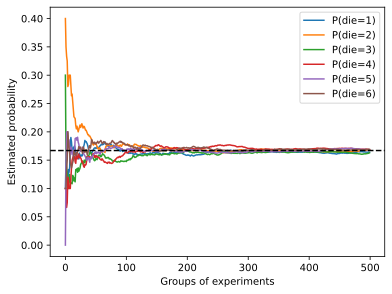

In [42]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
             label=(f'P(die={str(i + 1)})'))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()